In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
from os import system

In [4]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev641+master.f0c0668
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2734+master.091d785


In [5]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/06/1520312495.h5'

In [6]:
d = katdal.open(h5_filename);
ant_list,ants = [],[]
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520311726.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added '1334-127' [radec] (and 1 aliases)
DEBUG: Added '1345+125' [radec] (and 1 aliases)
DEBUG: Added 'CTD93' [radec] (and 1 aliases)
DEBUG: Added '1709-281' [radec] (and 1 aliases)
DEBUG: Added '1722-554' [radec] (and 1 aliases)
DEBUG: Added 'NRAO530' [radec] (and 1 aliases)
DEBUG: Added '1740-517' [radec] (and 1 aliases)
DEBUG: Added '1827-360' [radec] (and 1 aliases)
DEBUG: Added '1830-210' [radec] (and 1 aliases)
DEBUG: Added 'OV-236' [radec] (and 1 aliases)
DEBUG: Added '1934-638' [radec] (and 1 aliases)
DEBUG: Added '2128+048' [radec] (and 1 aliases)
DEBUG: Added 

In [7]:
ant_list.remove('m063') # not working
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m003,m006,m009,m011,m017,m021,m023,m029,m035,m037,m048,m051,m052,m060
env: ants=m003,m006,m009,m011,m017,m021,m023,m029,m035,m037,m048,m051,m052,m060


In [8]:
ref_ant='m006'
%set_env ref_ant=$ref_ant

env: ref_ant=m006



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520311726.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (14): m003, m006 (*ref*), m009, m011, m017, m021, m023, m029, m035, m037, m048, m051, m052, m060 [pol H]
baselines (91): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 0-9 0-10 0-11 0-12 0-13 1-10 1-11 1-12 1-13 2-11 2-12 2-13 3-12 3-13 4-13
scan

scan  25 (  15 samples) 0.052 0.059 0.056 0.054 0.056 0.057 0.057 0.059 0.061 0.064 0.053 0.051 0.054 0.053 0.053 0.052 0.052 0.055 0.053 0.055 0.053 0.052 0.053 0.056 0.054 0.054 0.052 0.053 0.052 0.052 0.057 0.058 0.055 0.050 0.052 0.053 0.054 0.062 0.063 0.057 0.051 0.053 0.053 0.059 0.055 0.053 0.054 0.053 0.053 0.055 0.052 0.053 0.050 0.051 0.049 0.050 0.052 0.049 0.050 0.051 0.051 0.050 0.051 0.053 0.049 0.049 0.051 0.050 0.051 0.052 0.052 0.051 0.051 0.053 0.050 0.049 0.057 0.054 0.052 0.051 0.052 0.053 0.050 0.050 0.051 0.053 0.052 0.054 0.050 0.051 0.052 '2145+067'
scan  26 (   4 samples) skipped 'slew'
scan  27 (  15 samples) 0.038 0.041 0.044 0.044 0.040 0.065 0.042 0.046 0.056 0.052 0.036 0.036 0.037 0.036 0.037 0.037 0.036 0.038 0.037 0.038 0.036 0.038 0.038 0.041 0.046 0.038 0.037 0.037 0.039 0.041 0.047 0.061 0.041 0.036 0.037 0.038 0.050 0.109 0.224 0.075 0.037 0.039 0.039 0.064 0.041 0.039 0.040 0.039 0.040 0.041 0.038 0.040 0.035 0.036 0.036 0.036 0.037 0.036 0.036 0.

scan  52 (  15 samples) 0.020 0.020 0.020 0.020 0.020 0.019 0.020 0.021 0.020 0.019 0.020 0.019 0.020 0.019 0.020 0.020 0.019 0.020 0.020 0.020 0.020 0.020 0.019 0.021 0.020 0.020 0.021 0.020 0.020 0.019 0.020 0.019 0.020 0.019 0.020 0.020 0.019 0.020 0.019 0.019 0.020 0.020 0.020 0.019 0.021 0.020 0.021 0.020 0.021 0.021 0.020 0.020 0.019 0.019 0.018 0.021 0.020 0.019 0.019 0.020 0.019 0.019 0.019 0.020 0.018 0.019 0.020 0.018 0.020 0.020 0.020 0.020 0.019 0.022 0.019 0.020 0.019 0.021 0.019 0.019 0.020 0.020 0.019 0.019 0.020 0.020 0.020 0.020 0.020 0.020 0.019 '1830-210'
scan  53 (   8 samples) skipped 'slew'
scan  54 (  15 samples) 0.029 0.030 0.030 0.030 0.029 0.034 0.030 0.028 0.031 0.031 0.029 0.028 0.031 0.030 0.030 0.030 0.030 0.032 0.030 0.031 0.029 0.033 0.031 0.031 0.029 0.032 0.031 0.031 0.030 0.030 0.030 0.028 0.031 0.030 0.030 0.031 0.029 0.031 0.029 0.030 0.029 0.030 0.031 0.030 0.033 0.031 0.032 0.031 0.031 0.032 0.031 0.032 0.029 0.030 0.029 0.030 0.030 0.029 0.029 0.

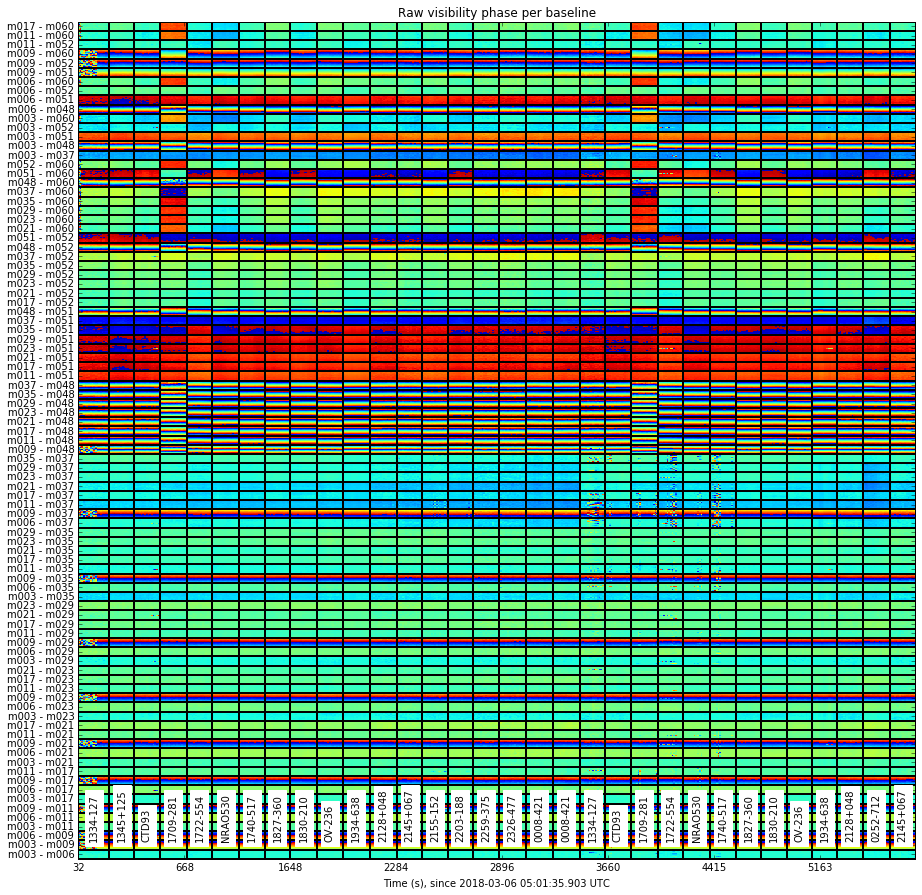

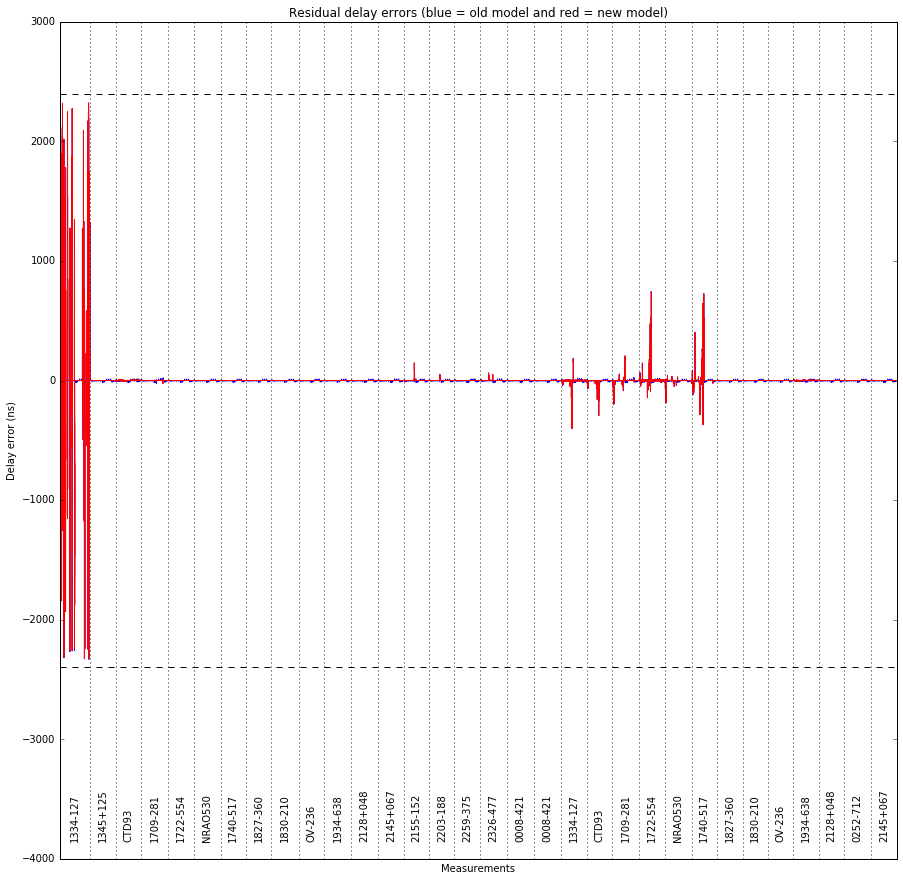

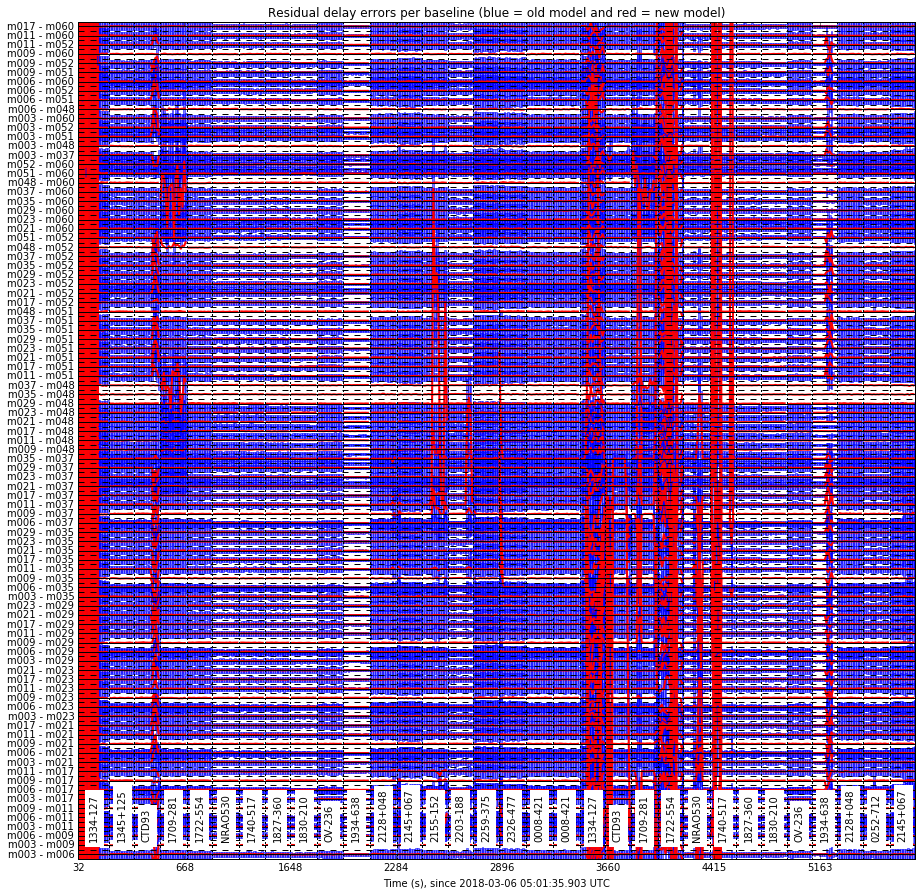

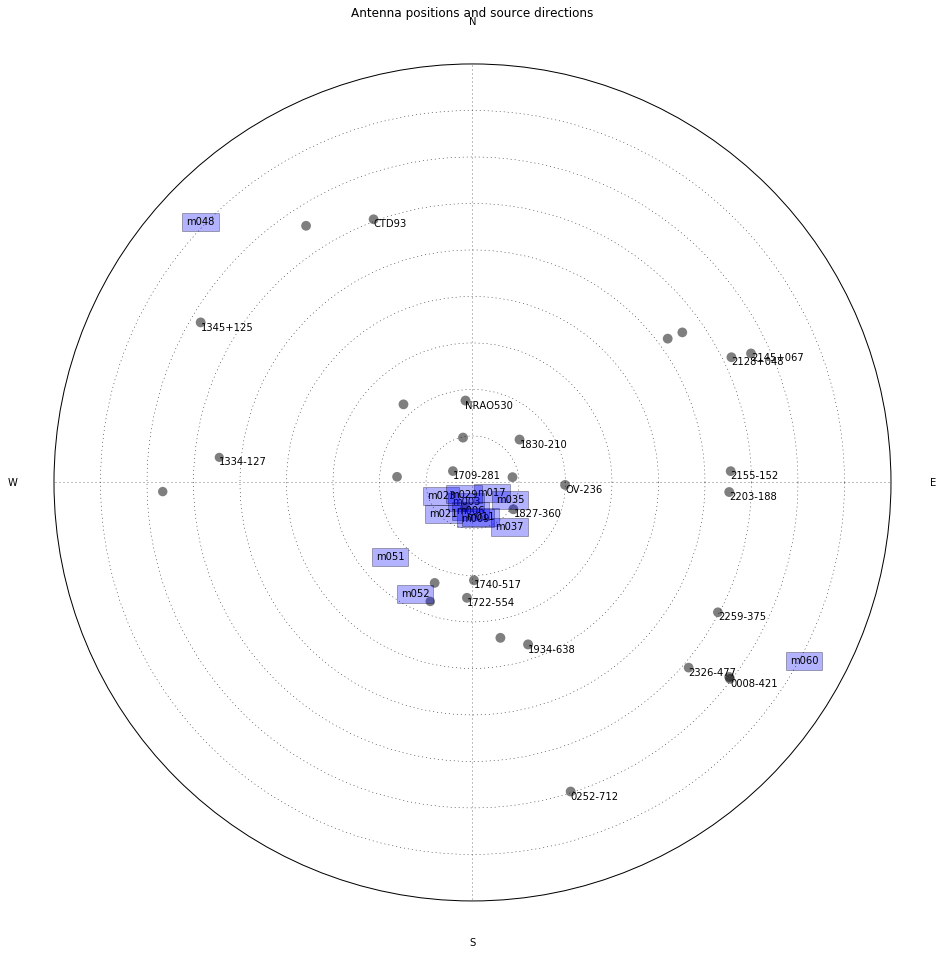

In [9]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
 -a $ants $h5_filename



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520311726.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (14): m003, m006 (*ref*), m009, m011, m017, m021, m023, m029, m035, m037, m048, m051, m052, m060 [pol V]
baselines (91): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 0-9 0-10 0-11 0-12 0-13 1-10 1-11 1-12 1-13 2-11 2-12 2-13 3-12 3-13 4-13
scan

scan  25 (  15 samples) 0.062 0.058 0.058 0.056 0.060 0.061 0.059 0.060 0.062 0.061 0.057 0.057 0.057 0.057 0.059 0.057 0.059 0.061 0.058 0.059 0.058 0.054 0.058 0.058 0.057 0.058 0.056 0.057 0.058 0.058 0.063 0.064 0.064 0.057 0.060 0.059 0.058 0.059 0.061 0.066 0.055 0.057 0.062 0.060 0.059 0.058 0.060 0.058 0.059 0.058 0.059 0.057 0.055 0.056 0.056 0.056 0.056 0.057 0.055 0.056 0.056 0.055 0.058 0.056 0.056 0.055 0.057 0.055 0.057 0.060 0.057 0.059 0.056 0.058 0.055 0.056 0.054 0.056 0.054 0.055 0.057 0.057 0.056 0.056 0.057 0.056 0.057 0.059 0.055 0.057 0.060 '2145+067'
scan  26 (   4 samples) skipped 'slew'
scan  27 (  15 samples) 0.045 0.044 0.048 0.042 0.045 0.062 0.044 0.050 0.051 0.051 0.041 0.044 0.043 0.042 0.045 0.043 0.043 0.048 0.043 0.045 0.042 0.041 0.043 0.042 0.043 0.046 0.041 0.042 0.043 0.055 0.063 0.067 0.048 0.043 0.044 0.043 0.069 0.101 0.218 0.097 0.044 0.044 0.043 0.117 0.047 0.045 0.047 0.045 0.047 0.045 0.046 0.045 0.041 0.043 0.042 0.044 0.041 0.042 0.042 0.

scan  52 (  15 samples) 0.021 0.020 0.021 0.021 0.020 0.020 0.020 0.022 0.021 0.021 0.021 0.020 0.021 0.020 0.021 0.021 0.021 0.021 0.022 0.022 0.022 0.020 0.020 0.021 0.020 0.021 0.022 0.021 0.021 0.020 0.021 0.021 0.022 0.021 0.022 0.020 0.020 0.020 0.020 0.021 0.021 0.021 0.021 0.021 0.022 0.021 0.022 0.021 0.022 0.021 0.022 0.021 0.020 0.021 0.019 0.022 0.021 0.020 0.020 0.021 0.021 0.021 0.021 0.020 0.020 0.020 0.021 0.020 0.021 0.022 0.021 0.022 0.021 0.023 0.021 0.021 0.020 0.021 0.020 0.020 0.021 0.021 0.020 0.020 0.021 0.020 0.021 0.022 0.021 0.021 0.021 '1830-210'
scan  53 (   8 samples) skipped 'slew'
scan  54 (  15 samples) 0.033 0.032 0.032 0.032 0.033 0.036 0.034 0.032 0.034 0.035 0.032 0.032 0.033 0.033 0.033 0.034 0.033 0.035 0.033 0.035 0.033 0.034 0.033 0.033 0.032 0.034 0.034 0.035 0.033 0.033 0.033 0.031 0.035 0.034 0.034 0.033 0.032 0.033 0.032 0.034 0.032 0.034 0.033 0.033 0.035 0.035 0.036 0.034 0.036 0.034 0.035 0.034 0.032 0.033 0.032 0.033 0.033 0.033 0.032 0.

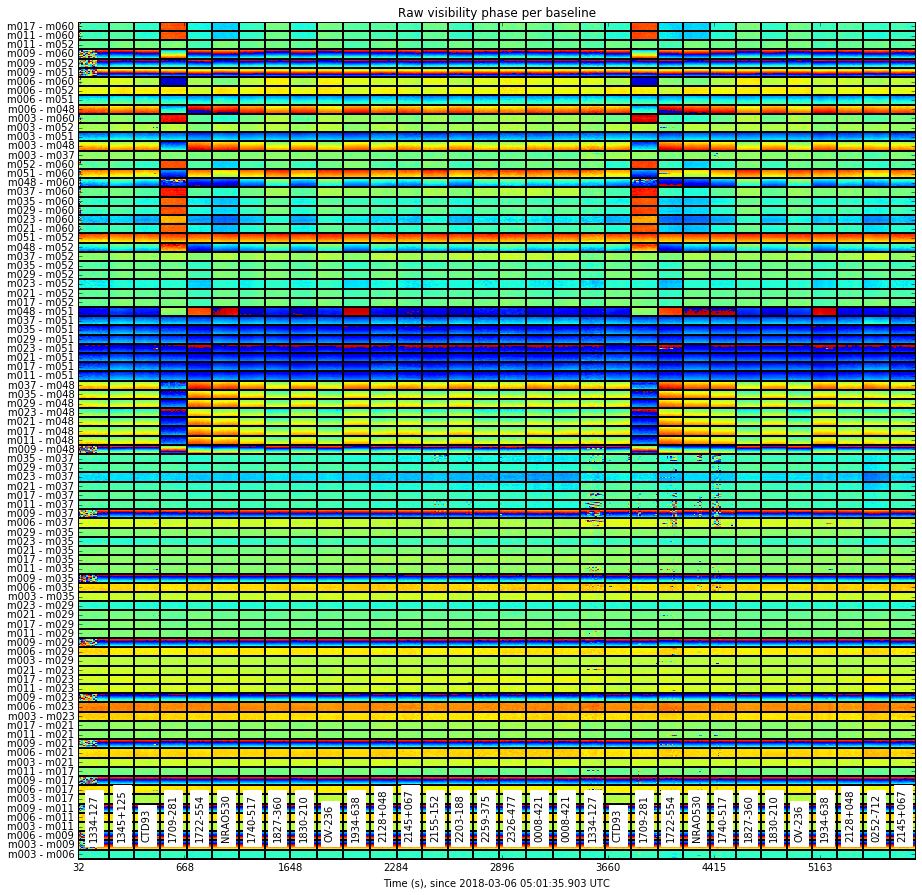

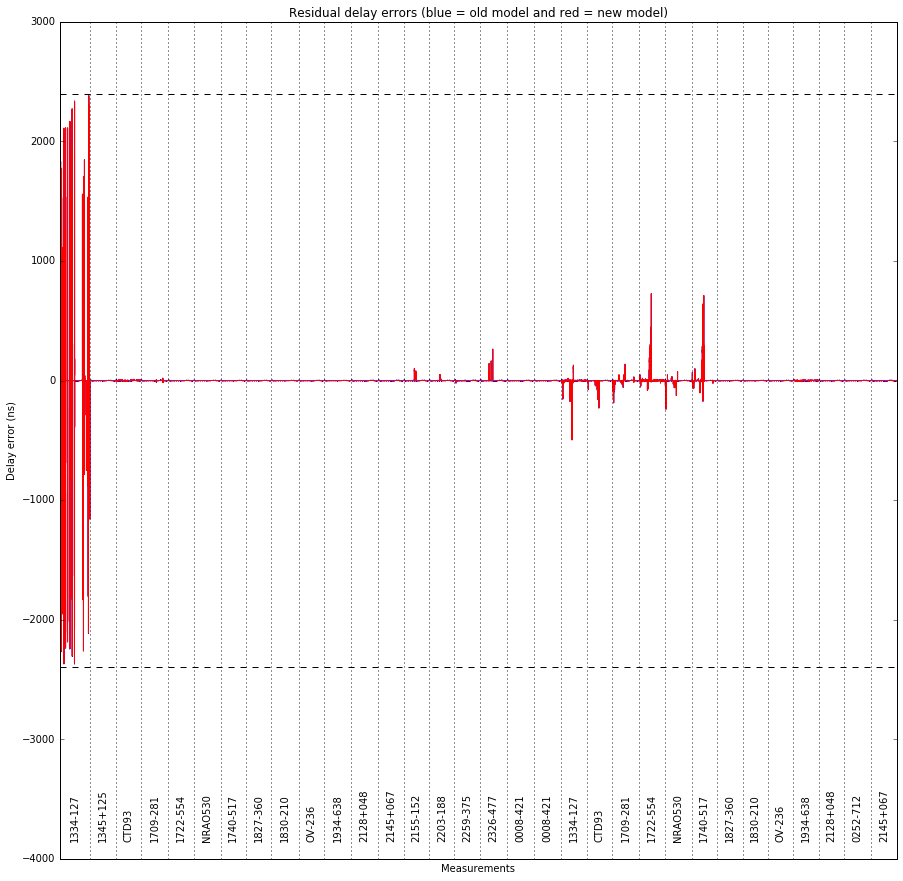

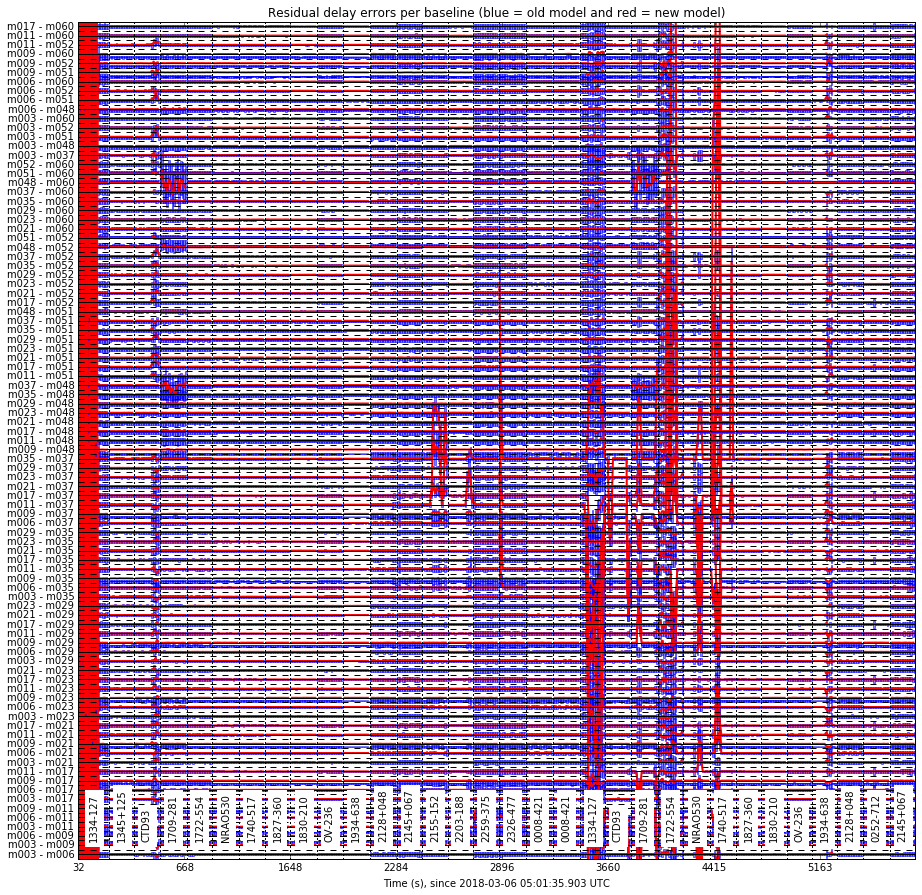

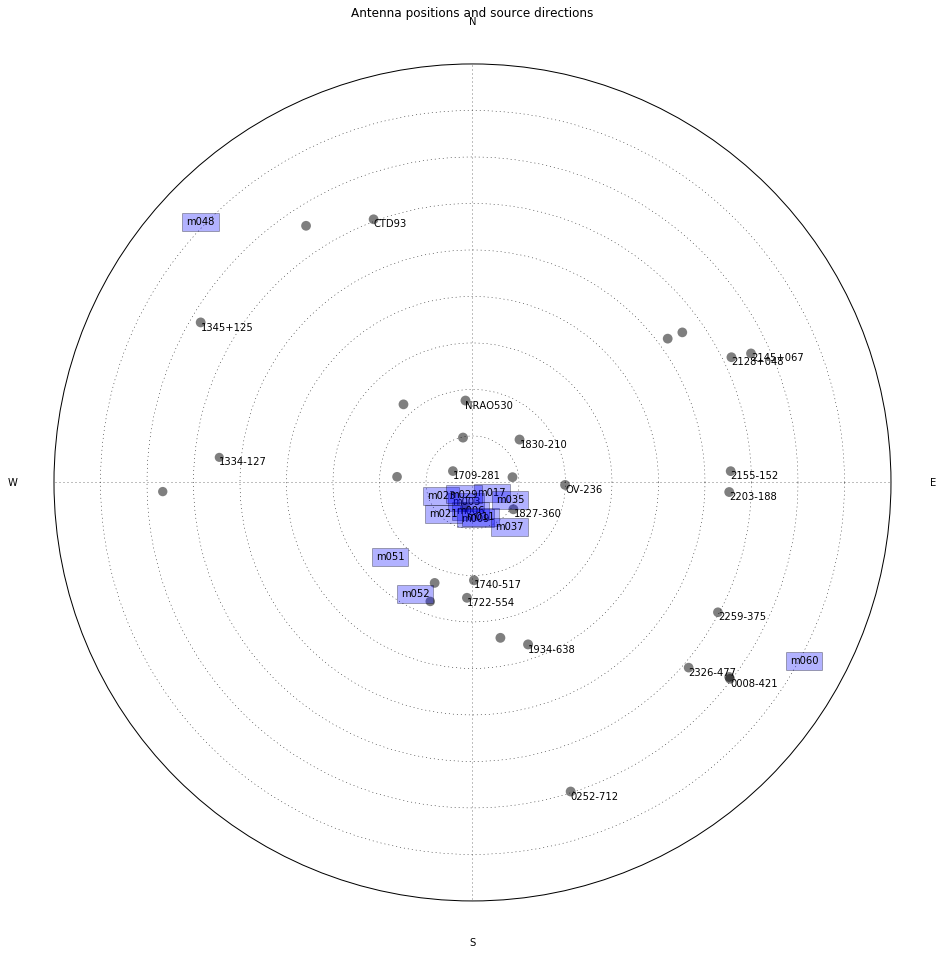

In [10]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
 -a $ants $h5_filename


In [11]:
res_h = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
  -a $ants  $h5_filename
print "Done H"

Done H


In [12]:
res_v = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
  -a $ants $h5_filename
print "Done V"

Done V


In [13]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h

{'m003': {'D': 5872.797, 'E': -66.509, 'N': -202.273, 'U': 0.893},
 'm006': {'D': 5880.202, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm009': {'D': 5851.372, 'E': 32.37, 'N': -371.049, 'U': 2.741},
 'm011': {'D': 5882.337, 'E': 84.024, 'N': -352.073, 'U': 2.755},
 'm017': {'D': 5875.193, 'E': 199.633, 'N': -112.257, 'U': 1.547},
 'm021': {'D': 5888.371, 'E': -295.957, 'N': -327.238, 'U': 0.727},
 'm023': {'D': 5872.104, 'E': -322.299, 'N': -142.183, 'U': -0.566},
 'm029': {'D': 5874.599, 'E': -88.749, 'N': -124.106, 'U': 0.311},
 'm035': {'D': 5855.368, 'E': 386.16, 'N': -180.889, 'U': 2.884},
 'm037': {'D': 5863.721, 'E': 380.302, 'N': -459.293, 'U': 4.753},
 'm048': {'D': 5868.983, 'E': -2805.619, 'N': 2686.892, 'U': -17.121},
 'm051': {'D': 5870.33, 'E': -850.241, 'N': -769.357, 'U': 0.228},
 'm052': {'D': 5862.134, 'E': -593.182, 'N': -1148.657, 'U': 3.158},
 'm060': {'D': 5875.228, 'E': 3419.683, 'N': -1840.498, 'U': 16.255}}

In [14]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

{'m003': {'D': 5874.424, 'E': -66.507, 'N': -202.273, 'U': 0.895},
 'm006': {'D': 5880.993, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm009': {'D': 5852.133, 'E': 32.371, 'N': -371.047, 'U': 2.744},
 'm011': {'D': 5883.222, 'E': 84.022, 'N': -352.076, 'U': 2.758},
 'm017': {'D': 5875.946, 'E': 199.635, 'N': -112.258, 'U': 1.551},
 'm021': {'D': 5889.125, 'E': -295.954, 'N': -327.235, 'U': 0.728},
 'm023': {'D': 5873.713, 'E': -322.297, 'N': -142.181, 'U': -0.568},
 'm029': {'D': 5876.195, 'E': -88.748, 'N': -124.106, 'U': 0.311},
 'm035': {'D': 5856.243, 'E': 386.169, 'N': -180.886, 'U': 2.891},
 'm037': {'D': 5864.597, 'E': 380.303, 'N': -459.3, 'U': 4.769},
 'm048': {'D': 5869.731, 'E': -2805.619, 'N': 2686.893, 'U': -17.119},
 'm051': {'D': 5871.214, 'E': -850.241, 'N': -769.36, 'U': 0.231},
 'm052': {'D': 5862.886, 'E': -593.182, 'N': -1148.658, 'U': 3.161},
 'm060': {'D': 5876.101, 'E': 3419.684, 'N': -1840.498, 'U': 16.26}}

# Cross check between polarizations for derived positions

In [15]:
for a in sorted(delays_v):
    print a,
    print("diff E %06.3f") %(delays_h[a]['E'] - delays_v[a]['E']),
    print("diff N %06.3f") %(delays_h[a]['N'] - delays_v[a]['N']),
    print("diff U %06.3f") %(delays_h[a]['U'] - delays_v[a]['U']),
    print("diff D %06.3f") %(delays_h[a]['D'] - delays_v[a]['D'])
    
# expect differences between E,N and U less than 1cm and Delays less than 3m 

m003 diff E -0.002 diff N 00.000 diff U -0.002 diff D -1.627
m006 diff E 00.000 diff N 00.000 diff U 00.000 diff D -0.791
m009 diff E -0.001 diff N -0.002 diff U -0.003 diff D -0.761
m011 diff E 00.002 diff N 00.003 diff U -0.003 diff D -0.885
m017 diff E -0.002 diff N 00.001 diff U -0.004 diff D -0.753
m021 diff E -0.003 diff N -0.003 diff U -0.001 diff D -0.754
m023 diff E -0.002 diff N -0.002 diff U 00.002 diff D -1.609
m029 diff E -0.001 diff N 00.000 diff U 00.000 diff D -1.596
m035 diff E -0.009 diff N -0.003 diff U -0.007 diff D -0.875
m037 diff E -0.001 diff N 00.007 diff U -0.016 diff D -0.876
m048 diff E 00.000 diff N -0.001 diff U -0.002 diff D -0.748
m051 diff E 00.000 diff N 00.003 diff U -0.003 diff D -0.884
m052 diff E 00.000 diff N 00.001 diff U -0.003 diff D -0.752
m060 diff E -0.001 diff N 00.000 diff U -0.005 diff D -0.873


In [16]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [17]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [18]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [19]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')
df


Delay Solutions and antenna locations



,Ants,Delay,East,North,UP,TOC,,delta UP,delta TOC
0,m003,5872.797,-66.508,-202.273,0.894,1051.754,,0.0000,0.000
1,m006,5880.202,-18.223,-295.428,1.793,1052.590,,0.8990,0.836
2,m009,5851.372,32.3705,-371.048,2.7425,1053.549,,0.9495,0.959
3,m011,5882.337,84.023,-352.0745,2.7565,1053.521,,0.0140,-0.028
4,m017,5875.193,199.634,-112.2575,1.549,1052.645,,-1.2075,-0.876
5,m021,5888.371,-295.9555,-327.2365,0.7275,1051.566,,-0.8215,-1.079
6,m023,5872.104,-322.298,-142.182,-0.567,1049.283,,-1.2945,-2.283
7,m029,5874.599,-88.7485,-124.106,0.311,1051.263,,0.8780,1.980
8,m035,5855.368,386.1645,-180.8875,2.8875,1053.656,,2.5765,2.393
9,m037,5863.721,380.3025,-459.2965,4.761,1055.633,,1.8735,1.977


In [20]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)


32512